# <center> <span style="color:red">Music recognition </span> </center>

The purpose of this notebook is to take in music spectrograms and to recognize musical genres

## Import 

In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

## Import Model Linear and MLP 

In [2]:
import sys  
sys.path.insert(0, '../../python')

from linearModel import linearModel
from mlp import MLPModel

## Create Model 

In [3]:
lm = linearModel()
mlp = MLPModel()

## Algorithme 

In [4]:
def import_images_and_assign_labels(
        folder, label, X, Y
):
    for file in os.listdir(folder):
        image_path = os.path.join(folder, file)
        im = Image.open(image_path)
        im = im.resize((8, 8))
        im = im.convert("RGB")
        im_arr = np.array(im)
        im_arr = np.reshape(im_arr, (8 * 8 * 3))
        X.append(im_arr)
        Y.append(label)

In [5]:
def import_dataset():
    dataset_folder = "G:/Programmes/Python/projetAnnuel/data"
    train_folder = os.path.join(dataset_folder, "train")
    test_folder = os.path.join(dataset_folder, "test")

    X_train = []
    y_train = []
    import_images_and_assign_labels(
        os.path.join(train_folder, "Electro"), 1.0, X_train, y_train
    )
    import_images_and_assign_labels(
        os.path.join(train_folder, "Metal"), -1.0, X_train, y_train
    )
    X_test = []
    y_test = []
    import_images_and_assign_labels(
        os.path.join(test_folder, "Electro"), 1.0, X_test, y_test
    )
    import_images_and_assign_labels(
        os.path.join(test_folder, "Metal"), -1.0, X_test, y_test
    )

    return (np.array(X_train) / 255.0, np.array(y_train)), \
           (np.array(X_test) / 255.0, np.array(y_test))

In [17]:
def run_mlp():
    (X_train, y_train), (X_test, y_test) = import_dataset()
    
    resultat1 = mlp.create_mlp_model([2,4,1])
    model1 = resultat1[0]
       
    test_dataset = [[x1 , x2 ] for x1 in range(-10, 10) for x2 in range(-10, 10)]
    colors = ["blue" if output >= 0 else "red" for output in y_train]

    predicted_outputs = [mlp.predict_mlp_model_classification(model1, p) for p in test_dataset]


    predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
    plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
    plt.scatter([p[0] for p in X_train], [p[1] for p in X_train], c=colors, s=200)
    plt.show()

    flattened_dataset_inputs = []
    for p in X_train:
        flattened_dataset_inputs.append(p[0])
        flattened_dataset_inputs.append(p[1])

    mlp.train_classification_stochastic_gradient_backpropagation(model1,
                                                                       flattened_dataset_inputs,
                                                                       y_train,
                                                                       alpha=0.01,
                                                                       iterations_count=100000)


    predicted_outputs = [mlp.predict_mlp_model_classification(model1, p) for p in test_dataset]
    predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]

    plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors,s=100)
    plt.scatter([p[0] for p in X_train], [p[1] for p in X_train], c=colors, s=10)

    plt.show()

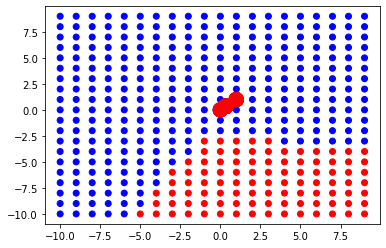

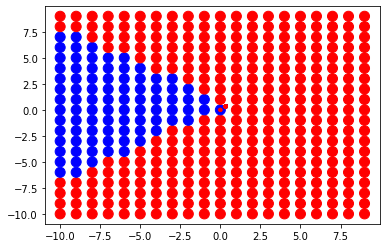

In [18]:
run_mlp()